## Tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as dp
import numpy as np

In [3]:
(x_train, y_train),( x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

11490434/11490434 [==============================] - 2s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

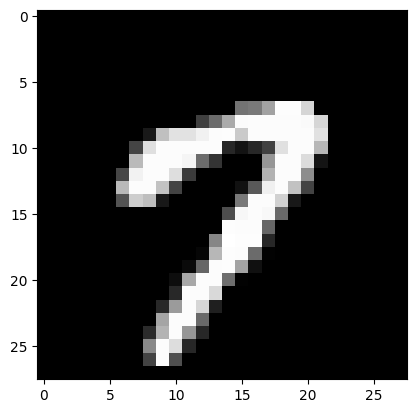

In [3]:
plt.imshow(x_train[15],cmap='gray')


In [4]:
x_train = tf.reshape(x_train,[-1, 28*28])
x_test =  tf.reshape(x_test,[-1, 28*28])

x_train, x_test = x_train/255, x_test/255

In [56]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(TensorShape([60000, 784]),
 TensorShape([10000, 784]),
 TensorShape([60000, 10]),
 TensorShape([10000, 10]))

In [5]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

##Sequential

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28*28]),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 512)               131584    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 398986 (1.52 MB)
Trainable params: 398986 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics= [tf.metrics.CategoricalAccuracy()]
              )

In [72]:
model.fit(x= x_train, y= y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.2362 - categorical_accuracy: 0.9292 - val_loss: 0.1321 - val_categorical_accuracy: 0.9595
Epoch 2/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1159 - categorical_accuracy: 0.9653 - val_loss: 0.0938 - val_categorical_accuracy: 0.9720
Epoch 3/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0863 - categorical_accuracy: 0.9738 - val_loss: 0.0888 - val_categorical_accuracy: 0.9728
Epoch 4/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0671 - categorical_accuracy: 0.9797 - val_loss: 0.1004 - val_categorical_accuracy: 0.9715
Epoch 5/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0586 - categorical_accuracy: 0.9814 - val_loss: 0.0954 - val_categorical_accuracy: 0.9743
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0489 - categorical_accuracy: 0.9846 - val_loss: 0.0758 - val_categorical

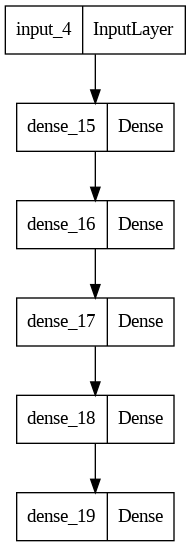

In [73]:
tf.keras.utils.plot_model(model)

##Factional API

In [15]:
def hidden_block(x,hidden_units=512, dropout=0.1):
    hidden1 = tf.keras.layers.Dense(units=hidden_units, activation= 'relu')(input)
    hidden1 = tf.keras.layers.Dropout(dropout)(hidden1)
    hidden1 = tf.keras.layers.Dense(units=hidden_units, activation= 'relu')(hidden1)
    hidden1 = tf.keras.layers.Dropout(dropout)(hidden1)
    hidden2 = tf.keras.layers.Dense(units=hidden_units, activation= 'relu')(hidden1)
    conc = tf.keras.layers.Concatenate()([input , hidden2 ])
    return conc


In [16]:
input = tf.keras.layers.Input(shape=[28*28])
block1= hidden_block(input, 256, 0.1)
block2= hidden_block(block1, 512, 0.1)
ouptut = tf.keras.layers.Dense(units=10, activation='softmax')(block2)

model = tf.keras.Model(inputs=[input], outputs=[ouptut])

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 512)                  401920    ['input_5[0][0]']             
                                                                                                  
 dropout_2 (Dropout)         (None, 512)                  0         ['dense_18[0][0]']            
                                                                                                  
 dense_19 (Dense)            (None, 512)                  262656    ['dropout_2[0][0]']           
                                                                                            

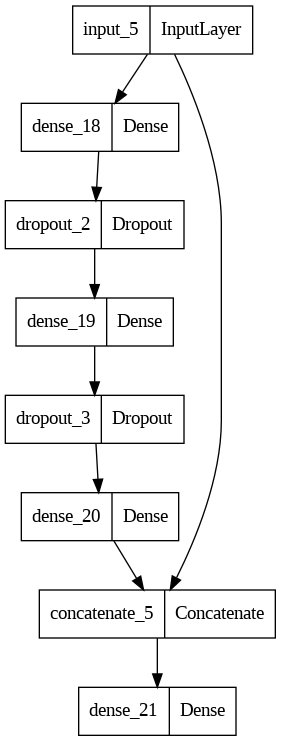

In [17]:
tf.keras.utils.plot_model(model)

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics= ['acc']
              )

In [19]:
model.fit(x= x_train, y= y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 11s 4ms/step - loss: 0.2157 - acc: 0.9335 - val_loss: 0.1061 - val_acc: 0.9683
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1043 - acc: 0.9683 - val_loss: 0.0701 - val_acc: 0.9795
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0778 - acc: 0.9762 - val_loss: 0.0859 - val_acc: 0.9748
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0615 - acc: 0.9809 - val_loss: 0.0689 - val_acc: 0.9822
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0518 - acc: 0.9837 - val_loss: 0.0731 - val_acc: 0.9803
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0468 - acc: 0.9850 - val_loss: 0.0767 - val_acc: 0.9800
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0420 - acc: 0.9870 - val_loss: 0.0692 - val_acc: 0.9837
Epoch 8/10
1688/1688 [==============================] - 7s 4m

##Subclassing API

In [31]:
class WideDeepModel(tf.keras.Model):
  def __init__(self, input_shape, units=30, act='relu', dropout=0.2, **kwargs):
     super(WideDeepModel, self).__init__(**kwargs)

     self.input_layer = tf.keras.layers.Input(input_shape)
     self.hidden1 = tf.keras.layers.Dense(units=units, activation=act)
     self.dropout1 = tf.keras.layers.Dropout(dropout)
     self.hidden2 = tf.keras.layers.Dense(units=units, activation=act)
     self.dropout2 = tf.keras.layers.Dropout(dropout)
     self.out = tf.keras.layers.Dense(units=10, activation='softmax')

  def build_graph(self):
    x = self.input_layer
    return tf.keras.Model(inputs=[x], outputs=self.call(x))

  def call(self, inputs):
    x = self.hidden1(inputs)
    x = self.dropout1(x)
    x = self.hidden2(x)
    x = self.dropout2(x)
    conc = tf.keras.layers.concatenate([x,inputs])
    output = self.out(conc)
    return output





In [32]:
model = WideDeepModel(input_shape=(784))
model.build(input_shape=(None,784))

In [22]:
model.summary()

Model: "wide_deep_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             multiple                  23550     
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 dense_10 (Dense)            multiple                  930       
                                                                 
 dropout_7 (Dropout)         multiple                  0         
                                                                 
 dense_11 (Dense)            multiple                  8150      
                                                                 
Total params: 32630 (127.46 KB)
Trainable params: 32630 (127.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics= ['acc']
              )

In [25]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.1 )

Epoch 1/10
1688/1688 [==============================] - 11s 4ms/step - loss: 0.4163 - acc: 0.8846 - val_loss: 0.1865 - val_acc: 0.9488
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2340 - acc: 0.9324 - val_loss: 0.1510 - val_acc: 0.9583
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1960 - acc: 0.9424 - val_loss: 0.1327 - val_acc: 0.9637
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1748 - acc: 0.9481 - val_loss: 0.1306 - val_acc: 0.9642
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1605 - acc: 0.9517 - val_loss: 0.1144 - val_acc: 0.9677
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1487 - acc: 0.9544 - val_loss: 0.1172 - val_acc: 0.9677
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1409 - acc: 0.9575 - val_loss: 0.1120 - val_acc: 0.9682
Epoch 8/10
1688/1688 [==============================] - 6s 4m

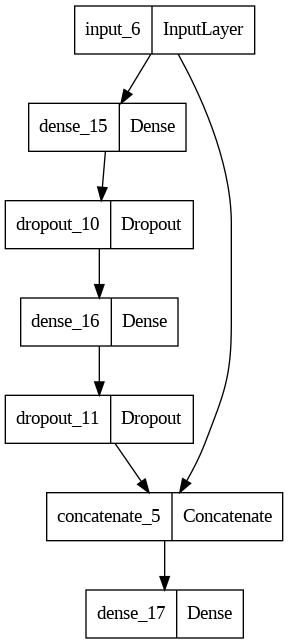

In [33]:
  tf.keras.utils.plot_model(model.build_graph())